In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv("/content/drive/MyDrive/loan.csv")
df.drop("Loan_ID",axis=1,inplace=True)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
df.shape

(614, 12)

In [133]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [134]:
# Fill missing numeric values with the mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [135]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [136]:
x = df.drop("Loan_Status_Y",axis=1)
y = df["Loan_Status_Y"]

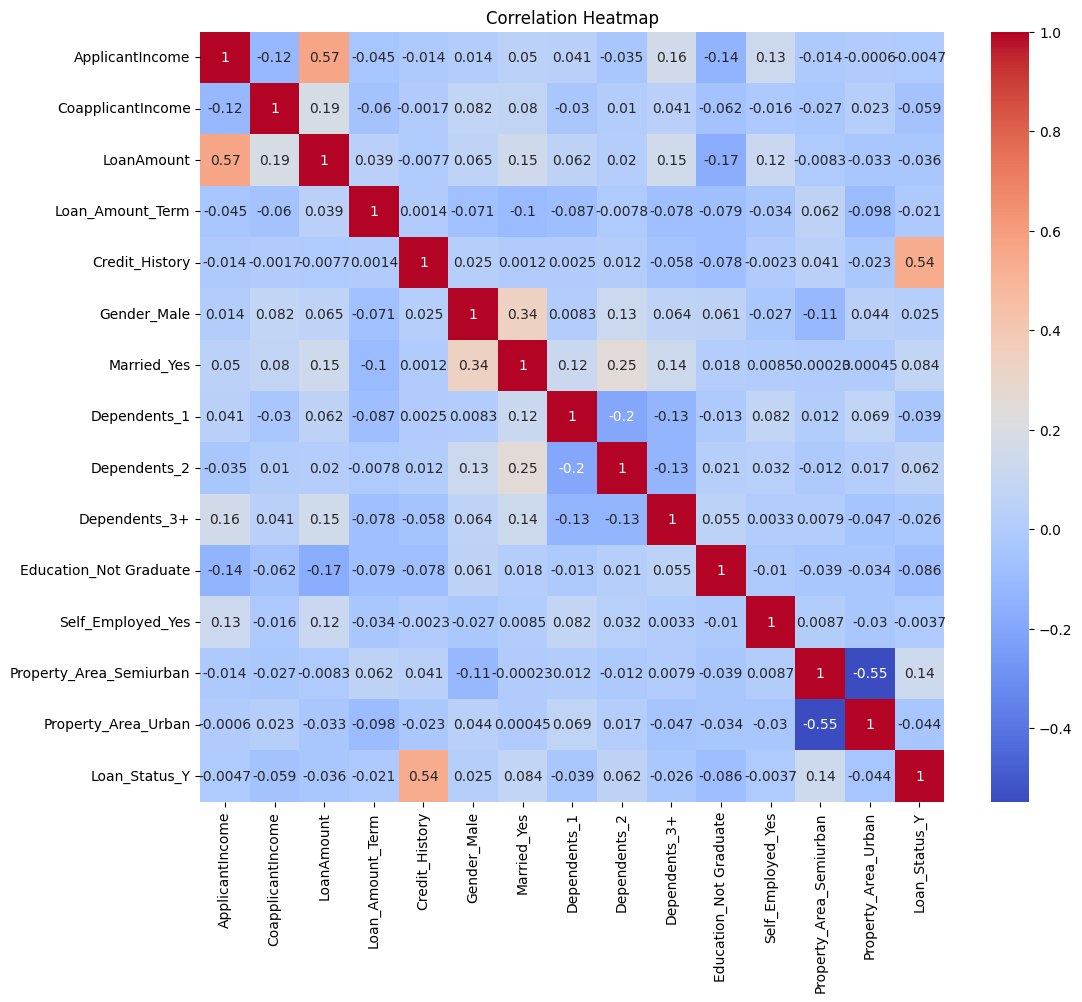

In [137]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [138]:
less_influential_features = ['Self_Employed_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Gender_Male',
                             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df.drop(less_influential_features, axis=1, inplace=True)

display(df.head())

,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,False,False,False,True,True
1,1.0,True,False,False,False,False
2,1.0,True,False,False,True,True
3,1.0,True,True,False,True,True
4,1.0,False,False,False,True,True


In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [140]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [141]:
y_pred = model.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7837837837837838
